# Ch3 Decorrelating your data and dimension reduction

# Correlated data in nature

You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

**Instructions**

- Import:
        matplotlib.pyplot as plt.
        pearsonr from scipy.stats.
- Assign column 0 of grains to width and column 1 of grains to length.
- Make a scatter plot with width on the x-axis and length on the y-axis.
- Use the pearsonr() function to calculate the Pearson correlation of width and length.


<video controls src="https://thumbs.gfycat.com/CalmPopularDalmatian-mobile.mp4" />

![url](https://miro.medium.com/max/700/1*XGaA7KWUlhWZLIezYEBIHA.gif)

In [1]:
import pandas as pd

grains = pd.read_csv('../datasets/Grains/seeds-width-vs-length.csv', header=None).values
# print(grains)

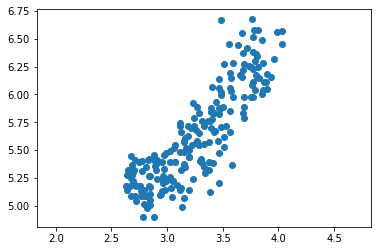

0.8604149377143469


In [3]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

# Variance of the PCA features

The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

**Instructions**

- Create an instance of StandardScaler called scaler.
- Create a PCA instance called pca.
- Use the make_pipeline() function to create a pipeline chaining scaler and pca.
- Use the .fit() method of pipeline to fit it to the fish samples samples.
- Extract the number of components used using the .n_components_ attribute of pca. Place this inside a range() function and store the result as features.
- Use the plt.bar() function to plot the explained variances, with features on the x-axis and pca.explained_variance_ on the y-axis.
 

In [4]:
samples = pd.read_csv('../datasets/fish.csv')
samples = samples.drop(samples.columns[0], axis=1).values
samples.shape

(84, 6)

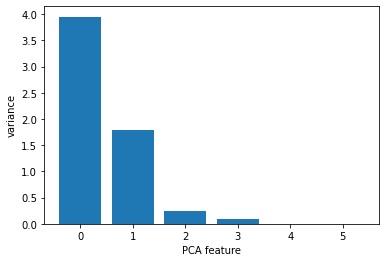

In [24]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


Intrinsic dimension of the fish data

In the previous exercise, you plotted the variance of the PCA features of the fish measurements. Looking again at your plot, what do you think would be a reasonable choice for the "intrinsic dimension" of the fish measurements? Recall that the intrinsic dimension is the number of PCA features with significant variance.

> 2

## Intrinsic dimension
- Intrinsic dimension = number of features needed to approximate the dataset
- What is the most compact representation of the samples
-  That the intrinsic dimension is the **number of PCA features with significant variance** !!!

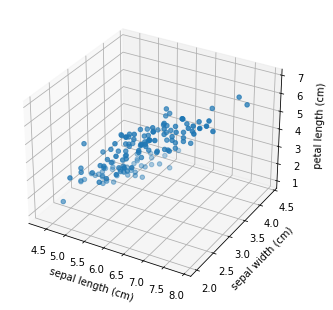

In [31]:
from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

#we can see that they all lie very close to a flat, 2d sheet
ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2])
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
plt.show()

# A tf-idf word-frequency array

In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

You are given a list documents of toy documents about pets. Its contents have been printed in the IPython Shell.

**Instructions**

- Import TfidfVectorizer from sklearn.feature_extraction.text.
- Create a TfidfVectorizer instance called tfidf.
- Apply .fit_transform() method of tfidf to documents and assign the result to csr_mat. This is a word-frequency array in csr_matrix format.
- Inspect csr_mat by calling its .toarray() method and printing the result. This has been done for you.
- The columns of the array correspond to words. Get the list of words by calling the .get_feature_names() method of tfidf, and assign the result to words.
 

In [32]:
# from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


# Clustering Wikipedia part I

You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

The Wikipedia dataset you will be working with was obtained from here.

**Instructions**

- Import:
        TruncatedSVD from sklearn.decomposition.
        KMeans from sklearn.cluster.
        make_pipeline from sklearn.pipeline.
- Create a TruncatedSVD instance called svd with n_components=50.
- Create a KMeans instance called kmeans with n_clusters=6.
- Create a pipeline called pipeline consisting of svd and kmeans.
 

In [41]:
wiki_df = pd.read_excel("../datasets/wikipedia.xlsx")
titles = wiki_df['Titles']
wiki_df.head()

,Titles,Articles
0,HTTP 404,"The HTTP 404, 404 Not Found and 404 error mess..."
1,Alexa Internet,"Alexa Internet, Inc. is an American company ba..."
2,Internet Explorer,Internet Explorer (formerly Microsoft Internet...
3,HTTP cookie,"An HTTP cookie (also called web cookie, Intern..."
4,Google Search,"Google Search, also referred to as Google Web ..."


In [45]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)


# Clustering Wikipedia part II

It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.

A solution to the previous exercise has been pre-loaded for you, so a Pipeline pipeline chaining TruncatedSVD with KMeans is available.

**Instructions**

- Import pandas as pd.
- Fit the pipeline to the word-frequency array articles.
- Predict the cluster labels.
- Align the cluster labels with the list titles of article titles by creating a DataFrame df with labels and titles as columns. This has been done for you.
- Use the .sort_values() method of df to sort the DataFrame by the 'label' column, and print the result.
- Hit 'Submit Answer' and take a moment to investigate your amazing clustering of Wikipedia pages!
 

In [51]:
wiki_df.Articles.values

array(['The HTTP 404, 404 Not Found and 404 error message is a Hypertext Transfer Protocol (HTTP) standard response code, in computer network communications, to indicate that the client was able to communicate with a given server, but the server could not find what was requested.\nThe website hosting server will typically generate a "404 Not Found" web page when a user attempts to follow a broken or dead link; hence the 404 error is one of the most recognizable errors encountered on the World Wide Web.\n\n\n== Overview ==\nWhen communicating via HTTP, a server is required to respond to a request, such as a web browser request for a web page, with a numeric response code and an optional, mandatory, or disallowed (based upon the status code) message. In the code 404, the first digit indicates a client error, such as a mistyped Uniform Resource Locator (URL). The following two digits indicate the specific error encountered. HTTP\'s use of three-digit codes is similar to the use of such co

In [52]:
articles = tfidf.fit_transform(wiki_df.Articles.values)

In [53]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)
print(labels)
# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


[5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 5 2 1 1 1 1 1 1 1 1 2 1]
    label                                        article
38      0                                         Neymar
36      0              2014 FIFA World Cup qualification
35      0                Colombia national football team
34      0                             Zlatan Ibrahimović
33      0                                 Radamel Falcao
32      0                                   Arsenal F.C.
31      0                              Cristiano Ronaldo
30      0                  France national football team
39      0                                  Franck Ribéry
37      0                                       Football
59      1                                    Adam Levine
50      1                                   Chad Kroeger
57      1                          Red Hot Chili Peppers
56      1                                       Skrillex
55      1             